In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [38]:
df = pd.read_csv('../../module_4/yulu_rental.csv')

In [39]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<Figure size 1000x600 with 0 Axes>

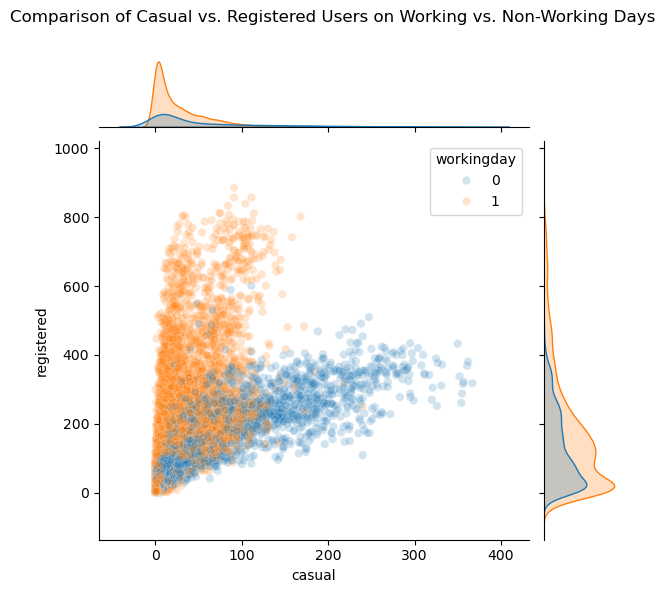

In [40]:
plt.figure(figsize=(10, 6))
g = sns.jointplot(
    data=df, 
    x='casual', 
    y='registered', 
    hue='workingday', 
    alpha=0.2
)
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Comparison of Casual vs. Registered Users on Working vs. Non-Working Days')
plt.show()

In [41]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['time_column'] = df['datetime'].dt.hour

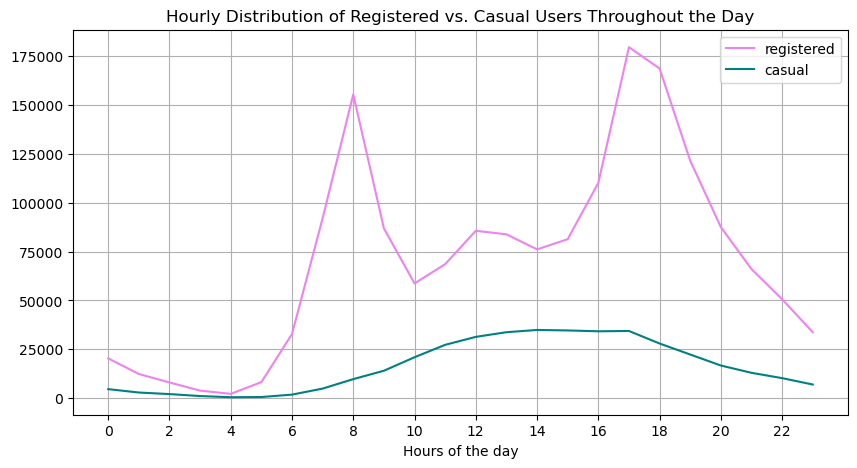

In [42]:
df_viz = df[['time_column', 'registered', 'casual']].groupby('time_column').agg({'registered': 'sum', 'casual': 'sum'})
df_viz.plot(figsize=(10, 5),color=['violet', 'teal'], ax=plt.gca())
plt.gca().set_xticks(df_viz.index[::2])
plt.xlabel('Hours of the day')
plt.title('Hourly Distribution of Registered vs. Casual Users Throughout the Day')
plt.grid(True)
plt.show();

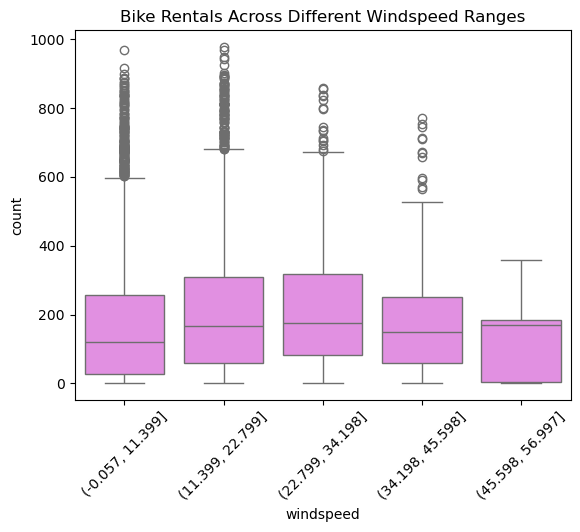

In [44]:
sns.boxplot(x=pd.cut(df['windspeed'], bins=5), y='count', data=df, color='violet')

plt.xticks(rotation=45) 
plt.title('Bike Rentals Across Different Windspeed Ranges')
plt.show()
